<a href="https://colab.research.google.com/github/RuslanFF1968/Pioneer/blob/main/Text_analysis_and_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import of libraries

In [1]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import os

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Dense, Dropout,SpatialDropout1D, BatchNormalization, Embedding, Flatten, Input

from tensorflow.keras.preprocessing.text import Tokenizer

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Data uploading

In [3]:
!rm -R /content/texts

rm: cannot remove '/content/texts': No such file or directory


In [4]:
# Writing the path to the base in the Google Drive, creating the folder texts and extracting from there
!unzip -q '/content/drive/My Drive/Базы/Тексты писателей.zip' -d /content/texts

In [5]:
def readText(fileName): # Declearing the functions for file reading. To the input the path to file is sent
  f = open(fileName, 'r')        # Setting the opening of the desired file in the read mode
  text = f.read()                # Reading the text
  text = text.replace("\n", " ") # Line breaks converting in spaces

  return text                    # Returing the file text

# Declaring the classes which are of interest
className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдберри"]
nClasses = len(className) # Counting the number of classes

In [6]:
!ls

drive  sample_data  texts


In [7]:
# Загружаем обучающие тексты

trainText = [] # Forming the training texts
testText = []  # Forming the test texts

# The formation shall be implemented as follows
# The class of each i-th element in the training sampling must correspond to
# to the class of each i-th element in the test sampling

for i in className:              # Go through each class
  for j in os.listdir('texts/'): # Go through each file in the folder with texts #
    if i in j:                   # Checking if the file j contains the name of the class i in the name

      if 'Обучающая' in j:                       # Если в имени найденного класса есть строка "Обучающая"
        trainText.append(readText('texts/' + j)) # добавляем в обучающую выборку
        print(j, 'добавлен в обучающую выборку') # Выводим информацию
      if 'Тестовая' in j:                        # Если в имени найденного класса есть строка "Тестовая"
        testText.append(readText('texts/' + j))  # добавляем в обучающую выборку
        print(j, 'добавлен в тестовую выборку')  # Выводим информацию
  print()

(О. Генри) Тестовая_20 вместе.txt добавлен в тестовую выборку
(О. Генри) Обучающая_50 вместе.txt добавлен в обучающую выборку

(Стругацкие) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Стругацкие) Тестовая_2 вместе.txt добавлен в тестовую выборку

(Булгаков) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Булгаков) Обучающая_5 вместе.txt добавлен в обучающую выборку

(Клиффорд_Саймак) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Клиффорд_Саймак) Обучающая_5 вместе.txt добавлен в обучающую выборку

(Макс Фрай) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Макс Фрай) Тестовая_2 вместе.txt добавлен в тестовую выборку

(Рэй Брэдберри) Тестовая_8 вместе.txt добавлен в тестовую выборку
(Рэй Брэдберри) Обучающая_22 вместе.txt добавлен в обучающую выборку



In [8]:
print(len(trainText))    # Количество элементов в trainText
print(len(trainText[0])) # Количество символов в первом источнике в trainText

6
1049517




```
# This is formatted as code
```

#Data processing


In [9]:
maxWordsCount = 30000 # Определяем максимальное количество слов/индексов, учитываемое при обучении текстов

# Воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
# num_words=maxWordsCount - определяем максимальное количество слов/индексов, учитываемое при обучении текстов
# filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n' - избавляемся от ненужных символов
# lower=True - приводим слова к нижнему регистру
# split=' ' - разделяем слова по пробелу
# char_level=False - просим токенайзер не удалять однобуквенные слова
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='unknown', char_level=False)

tokenizer.fit_on_texts(trainText) # "Скармливаем" наши тексты, т. е. даём в обработку методу, который соберет словарь частотности
items = list(tokenizer.word_index.items()) # Вытаскиваем индексы слов для просмотра

In [10]:
print(items[:50])                   # Посмотрим 50 самых часто встречающихся слов
print("Размер словаря", len(items)) # Длина словаря

[('unknown', 1), ('и', 2), ('в', 3), ('не', 4), ('я', 5), ('что', 6), ('на', 7), ('с', 8), ('он', 9), ('а', 10), ('как', 11), ('то', 12), ('это', 13), ('но', 14), ('все', 15), ('у', 16), ('по', 17), ('его', 18), ('к', 19), ('так', 20), ('мне', 21), ('из', 22), ('за', 23), ('меня', 24), ('ты', 25), ('же', 26), ('бы', 27), ('сказал', 28), ('вы', 29), ('было', 30), ('от', 31), ('они', 32), ('мы', 33), ('только', 34), ('да', 35), ('еще', 36), ('она', 37), ('о', 38), ('вот', 39), ('когда', 40), ('если', 41), ('уже', 42), ('был', 43), ('нет', 44), ('ни', 45), ('их', 46), ('ну', 47), ('чтобы', 48), ('до', 49), ('для', 50)]
Размер словаря 133070


In [11]:
# Преобразовываем текст в последовательность индексов согласно частотному словарю
trainWordIndexes = tokenizer.texts_to_sequences(trainText) # Обучающие тесты в индексы
testWordIndexes = tokenizer.texts_to_sequences(testText)   # Проверочные тесты в индексы

print("Взглянем на фрагмент обучающего текста:")
print("В виде оригинального текста:              ", trainText[1][:87])
print("Он же в виде последовательности индексов: ", trainWordIndexes[1][:20], '\n')

Взглянем на фрагмент обучающего текста:
В виде оригинального текста:               Парень из преисподней     1     Ну и деревня! Сроду я таких деревень не видел и не знал
Он же в виде последовательности индексов:  [473, 22, 29192, 1508, 47, 2, 12834, 7800, 5, 415, 27605, 4, 251, 2, 4, 249, 55, 6, 240, 9472] 



In [12]:
print("Статистика по обучающим текстам:")

symbolsTrainText = 0 # Объявляем переменную для подсчета символов в обучающих текстах
wordsTrainText = 0   # Объявляем переменную для подсчета слов в обучающих текстах

for i in range(nClasses): # Проходим по всем классам
  print(className[i], " "*(10-len(className[i])), len(trainText[i]), "символов, ", len(trainWordIndexes[i]), "слов")
  symbolsTrainText += len(trainText[i])      # Считаем символы
  wordsTrainText += len(trainWordIndexes[i]) # Считаем слова

print('----')
print("В сумме ", symbolsTrainText, " символов, ", wordsTrainText, " слов \n")
print()
print("Статистика по тестовым текстам:")

symbolsTestText = 0 # Объявляем переменную для подсчета символов в тестовых текстах
wordsTestText = 0   # Объявляем переменную для подсчета слов в тестовых текстах

for i in range(nClasses): # Проходим по всем классам
  print(className[i], ' '*(10-len(className[i])), len(testText[i]), "символов, ", len(testWordIndexes[i]), "слов")
  symbolsTestText += len(testText[i])      # Считаем символы
  wordsTestText += len(testWordIndexes[i]) # Считаем слова
print('----')
print("В сумме ", symbolsTestText, " символов, ", wordsTestText, " слов")

Статистика по обучающим текстам:
О. Генри    1049517 символов,  160607 слов
Стругацкие  2042469 символов,  313012 слов
Булгаков    1765648 символов,  261465 слов
Саймак      1609507 символов,  251502 слов
Фрай        3700010 символов,  568533 слов
Брэдберри   1386454 символов,  214454 слов
----
В сумме  11553605  символов,  1769573  слов 


Статистика по тестовым текстам:
О. Генри    349662 символов,  53238 слов
Стругацкие  704846 символов,  108621 слов
Булгаков    875042 символов,  132730 слов
Саймак      318811 символов,  50360 слов
Фрай        1278191 символов,  196731 слов
Брэдберри   868673 символов,  132524 слов
----
В сумме  4395225  символов,  674204  слов


#Generation of training and verification samples

**Функции для формирования выборки по отрезкам текста с заданным шагом**

In [13]:
###########################
# Формирование обучающей выборки по листу индексов слов
# (разделение на короткие векторы)
##########################
def getSetFromIndexes(wordIndexes, xLen, step): # wordIndexes - список индексов, xLen - длина отрезка разбиения, step - шаг разбиения
  xSample = []                # Создаем пустой список под результат
  wordsLen = len(wordIndexes) # Получаем длину списка индексов
  index = 0 # Задаем переменную, в которой будет храниться стартовый индекс для очередного "куска" разбиения

  #Идём по всей длине вектора индексов
  #"Откусываем" векторы длины xLen и смещаемся вперёд на step

  while (index + xLen <= wordsLen):               # Если можно получить очередной "кусок"
    xSample.append(wordIndexes[index:index+xLen]) # Добавляем в результирующий список элементы из wordIndexes, начиная с элемента с индексом index, заканчивая индексом index+xLen
    index += step                                 # Увеличиваем index на величину шага

# Таким образом на 0 итерации в результат добавятся элементы с 0 по 3000 (index=0, index + xLen = 3000)
# На первой итерации index увеличиваем на 100 и врезультат добавятся элементы с 100 по 1100 (index = 100, index + xLen = 1100)
# И так до тех пор, пока index + xLen не станет больше длины входного списка индексов wordsLen

  return xSample # Возвращаем сформированный список

In [14]:
###########################
# Формирование обучающей и проверочной выборки
# Из двух листов индексов от двух классов
##########################
def createSetsMultiClasses(wordIndexes, xLen, step): # wordIndexes - список индексов для всех классов, xLen - длина отрезка разбиения, step - шаг разбиения

  # Для каждого из 6 классов
  # Создаём обучающую/проверочную выборку из индексов
  nClasses = len(wordIndexes) # Задаем количество классов выборки
  classesXSamples = []        # Создаем пустой список под выборки для каждого из классов
  for wI in wordIndexes:      # для каждого текста выборки из последовательности индексов
    classesXSamples.append(getSetFromIndexes(wI, xLen, step)) # добавляем в список очередную выборку
  # В итоге classesXSamples будет иметь nClasses-элементов, где каждый элемент представляет собой список, который возвращает функция getSetFromIndexes

  # Формируем один общий xSamples
  x_train = [] # Создаем пустой список под x_train
  y_train = [] # Создаем пустой список под y_train

  for t in range(nClasses):   # Проходим по всем имеющимся классам
    currY = utils.to_categorical(t, nClasses) # Tекущий класс переводится в вектор длиной 6 вида [0.0.0.1.0.0.]
    xT = classesXSamples[t]   # Берем выборку для очередного класса
    for i in range(len(xT)):  # Проходим по всем элементам выборки
      x_train.append(xT[i])   # Добавляем в x_train
      y_train.append(currY)   # Добавляем соответствующий вектор класса

  x_train = np.array(x_train) # Переводим в массив numpy для подачи в нейронку
  y_train = np.array(y_train) # Переводим в массив numpy для подачи в нейронку

  return (x_train, y_train)   # Функция возвращает выборку и соответствующие векторы классов

**Data conditioning**

In [15]:
# Задаём базовые параметры
xLen = 3000 # Длина отрезка текста, по которой анализируем, в словах
step = 100  # Шаг разбиения исходного текста на обучающие вектора

In [16]:
# Формируем обучающую и тестовую выборку
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step) # Извлекаем обучающую выборку
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)    # Извлекаем тестовую выборку

# Отображаем размерности
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(17520, 3000)
(17520, 6)
(6566, 3000)
(6566, 6)


**Recognition of the test sampling**


In [17]:
###########################
# Представляем тестовую выборку в удобных для распознавания размерах
##########################
def createTestMultiClasses(wordIndexes, xLen, step): #функция принимает последовательность индексов, размер окна, шаг окна
  # Для каждого из 6 классов
  # Создаём тестовую выборку из индексов
  nClasses = len(wordIndexes) # Получаем количество классов
  xTest6Classes = []          # Создаем пустой список под результат
  for wI in wordIndexes:      # Проходим по всем текстам из входного набора wordIndexes
    sample = (getSetFromIndexes(wI, xLen, step)) # Разбиваем очерденой текст на отрезки длиной xLen с шагом step
    xTest6Classes.append(np.array(sample))       # Добавляем полученный список к результату
  return xTest6Classes        # Возвращаем сформированный список

###########################
# Распознаём тестовую выборку и выводим результаты
##########################
def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName) # Отображаем имя нейронки
  print()

  val = []  # Создаем пустой список под результат
  pred = [] # Создаем пустой список для хранений распознанных значений отдельных "кусков"

  totalSumRec = [] # Создаем пустой список под результат

  for i in range(nClasses):            # Проходим по всем классам
    currPred = model.predict(xTest[i]) # Распознаем i-тый элемент тестовой выборки (xTest[i] - список, который создается функцией createTestMultiClasses для i-го тестового набора)
    pred.append(currPred)              # Добавляем распознанный список значений в pred
    currOut = np.argmax(currPred, axis=1) # Опрделяем номер распознаного класса для каждого элемента из currPred

    # Считаем процент распознавания каждого класса за каждый
    # Получаем матрицу 6 на 6
    evVal = []
    sumRec = []
    for j in range(nClasses): # Проходим по всем классам
      sumRec.append(0)
      for t in range(len(currOut)): # Проходим по всему количество элементу в currOut (равно количество кусков, на которые был разделен исходных тестовый набор)
        if (currOut[t] == j):       # Если currOut[t] (класс, к которому модель отнесла данный кусок) равен текущему классу j
          sumRec[j] += 1            # То увеличиваем на 1 сумму sumRec для текущего класса
      evVal.append(sumRec[j] / len(currOut)) # Считаем evVel для текущего класса (количечство элеметнов, которые были отнесены к классу j делим на общее количество элементов)

    # В итоге evVal будет длиной равной количеству классу, где i-тый элемент показывает вероятность принадлежности к i-му классу
    # Например evVal = [0.79, 0.02, 0.13, 0.05, 0.03, 0.1] означает, что 79% всех элементов в xTest[i] были отнесены к первому классу писателей и т. д.
    totalSumRec.append(sumRec[i])   # Добавляем в totalSumRec количество вернораспознанных элементов sumRec[i] для i-го класса

    # Определяем, какой в класс в итоге за какой был распознан
    val.append(evVal[i]) # Добавляем процент для i-го класса из evVal в массив val
    recognizedClass = np.argmax(evVal) # Находим индекс максимального элемента в evVal (соответсвует номеру класса)

    # Выводим результаты распознавания по текущему классу
    isRecognized = "распознано НЕ ВЕРНО!" # По умолчанию "неверно"
    if (recognizedClass == i):            # Если индекс максимального элемента в evVal равен текущему классу i, то
      isRecognized = "распознано ВЕРНО!"  # распознано верно
    print(className[i], " распознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized) # Выводим информацию о распознавании

  # Выводим средний процент распознавания по всем классам вместе
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i]) # Увеличиваем общее количество элементов на длину len(xTest[i])
    sumVal += totalSumRec[i]  # Увеличиваем количество верных ответов на totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%") # Отображаем средний процент для всех примеров в тестовой выборке

  print()

  return sumVal/sumCount # Возвращаем средний процент распознавания

#Embedding


**Embedding + Dense**

In [18]:
# Создаём сеть с Embedding слоем
text_input = Input((xTrain.shape[1],)) # Задаем входной слой для нейронки (размерность входных данных равна xTrain.shape[1] (в нашем примере 3000))
emb = Embedding(maxWordsCount, 100, input_length=xLen)(text_input) # Добавляем Embedding-слой с размерностью векторного прстранства 100 (выбрано тестовым путем) и сохраняем в переменнуд emb

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - accuracy: 0.7100 - loss: 1.0354 - val_accuracy: 0.3794 - val_loss: 2.0918
Epoch 2/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 1.0000 - loss: 0.0148 - val_accuracy: 0.3195 - val_loss: 1.7796
Epoch 3/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.3972 - val_loss: 1.5345
Epoch 4/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.4737 - val_loss: 1.2752
Epoch 5/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.5841 - val_loss: 1.0634
Epoch 6/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 1.0000 - loss: 9.8395e-04 - val_accuracy: 0.6849 - val_loss: 0.8868
Epoch 7/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 1.0000 - loss: 7.2402e-04 - val_accuracy: 0.7394 - val_loss: 0.7807
Epoch 8/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 1.0000 - loss: 5.3962e-04 - val_accur

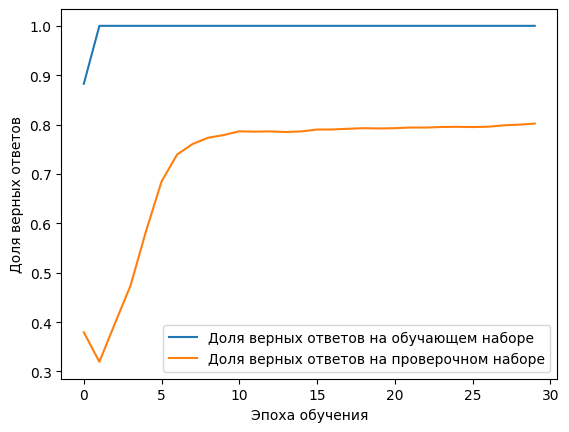

In [19]:
# Создаем стандартную полносвязную сеть для классификатора
x = SpatialDropout1D(0.25)(emb)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(200, activation="relu")(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
output = Dense(6, activation='softmax')(x) # Добавляем Dense-слой с softmax-Активацией и 6 нейронами

modelE = Model(text_input, output) # Создаем модель классификатора со входм text_input и выходом output

# Компилируем модель
modelE.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Обучаем сеть на xTrain-наборе
history = modelE.fit(xTrain,
                    yTrain,
                    epochs=30,
                    batch_size=200,
                    validation_data=(xTest, yTest))

# Отображаем графики для acc и vall_acc
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [20]:
modelE.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 3000, 100)      │     3,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 3000, 100)      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 300000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 300000)         │     1,200,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │    60,000,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,206 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191,405,820 (730.16 MB)

 Trainable params: 63,601,806 (242.62 MB)

 Non-trainable params: 600,400 (2.29 MB)

 Optimizer params: 127,203,614 (485.24 MB)

In [21]:
# Проверяем результаты работы Ebedding сети
xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step)
# Отобразим размерности тестовых текстов, разбитых на куски фиксированной длины
for i in range(nClasses):
  print(str(len(xTest6Classes[i])) + ' x ' + str(len(xTest6Classes[i][0])))

503 x 3000
1057 x 3000
1298 x 3000
474 x 3000
1938 x 3000
1296 x 3000


In [22]:
# Отобразим статистику распознавания по писателям
pred = recognizeMultiClass(modelE, xTest6Classes, "Embedding + Dense")

НЕЙРОНКА:  Embedding + Dense

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step
О. Генри  распознано  91 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Стругацкие  распознано  70 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Булгаков  распознано  69 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
Саймак  распознано  80 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Фрай  распознано  89 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Брэдберри  распознано  79 % сеть считает, что это  Брэдберри ,  распознано ВЕРНО!

Средний процент распознавания  80 %



#Clustering

In [23]:
# Создадим модель, которая на входе дает данные с embedding'а
model2 = Model(text_input, emb)


In [24]:
model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 3000, 100)      │     3,000,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,000,000 (11.44 MB)

 Trainable params: 3,000,000 (11.44 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Назначим нашей модели веса из обученной ранее модели классификатора
model2.layers[0] = modelE.layers[0] # Веса входного слоя нашей модели соответствуют весам входного слоя модели классификатора
model2.layers[1] = modelE.layers[1] # Веса Embedding слоя нашей модели соответствуют весам Embedding слоя модели классификатора

In [26]:
allwords = np.array([it[0] for it in items])   # Создадим список слов из нашего словаря items
allindexes = np.array([it[1] for it in items]) # Создадим список индексов из нашего словаря items

In [27]:
print(allwords[:20])   # Отобразим первый 20 слов
print(allindexes[:20]) # Отобразим первые 20 индексов

['unknown' 'и' 'в' 'не' 'я' 'что' 'на' 'с' 'он' 'а' 'как' 'то' 'это' 'но'
 'все' 'у' 'по' 'его' 'к' 'так']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [28]:
len(allwords)

133070

In [29]:
# Так как наша модель требует входные данные размерностью 3000
# Требуется преобразовать массив индексов allindexes таким образом, чтобы длина каждого из его элементов была равна 3000

# Один из способов реализовать это: размножить каждый элемент 3000 раз
words = np.array([np.array([allindexes[t] for i in range(3000)]) for t in range(5000)])

In [30]:
print(words.shape) # Отобразим размерность words

(5000, 3000)


In [31]:
print(words[0, :20]) # Отобразим первые 20 элементов 0го элемента
print(words[1, :20]) # Отобразим первые 20 элементов 1го элемента

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [32]:
outall = model2.predict(words) # Теперь можно вызывать predict для массива words

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step


ResourceExhaustedError: {{function_node __wrapped__ConcatV2_N_157_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[5000,3000,100] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:ConcatV2] name: concat

In [33]:
print(outall.shape) # Отобразим размерность outall

NameError: name 'outall' is not defined

In [34]:
# Так как в words все значения одной строки одинаковые (1,1,1,1... или 2,2,2,2.... и т.д.)
# То и outall все значения одной строки будут одинаковыми
# Поэтому без проблем можем оставить только 0-ые элементы из outall
outall2 = np.array([o[0] for o in outall])

NameError: name 'outall' is not defined

In [35]:
print(outall2.shape) # Выведем размерность outall2

NameError: name 'outall2' is not defined

In [36]:
print(outall2[0]) # Отобразим данные 0го элемента
# Они представляют из себя 100мерный вектор
# Этот вектор представляет собой закодированное слово "и" (1-е слово в нашем словаре)
# Во втором элементе будет храниться закодированное 100мерным вектором 2-е слово в словаре: "в"

NameError: name 'outall2' is not defined

In [ ]:
from sklearn.cluster import KMeans # Подключаем модуль Kmeans
import time # Подключаем модуль time

In [ ]:
current_time = time.time()    # Засекаем текщуее время начала операции
clustersCount = 100           # Задаем количество кластеров (выбрано произвольным путем из расчета того, что всего 20 000 слов берем)
kmean = KMeans(clustersCount) # Создаем экземпляр KMeans и указываем количество классов
kmean.fit(outall2)            # Делаем обработку по Embedding-данным из outall2
labels = kmean.labels_        # Запоминаем метки классов в labels
print ('Время обработки:' + str(round(time.time() - current_time)) + 'с.') # Выводим время работы алгоритма

In [ ]:
print(labels[:20]) # Отобразим первые 20 меток

In [ ]:
start_allwords = allwords[:5000] # Возьмем первые 5 000 слов из списка всех слов allwords

In [ ]:
print(start_allwords[labels==1]) # Отобразим, какие слова из start_allwords попали в 1 кластер

In [37]:
# Выведем 100 кластеров
for i in range(100):
  print(i, start_allwords[labels==i])

NameError: name 'start_allwords' is not defined